In [1]:
## Показываем, как ведет себя KK, в случаях, если:
# 1) Постоянный номильный зазор;
# 2) Постоянный неномильный зазор;
# 3) Непостоянный неномильный зазор;
# На рисунке 1 - KQ;
# На рисунке 2 - KK;
# На рисунке 3 - KR;
# На рисунке 4 - зазор у выбранного твэла;
#
#

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [3]:
####################################
####################################
########## FIRST ANALYSIS ##########
####################################
####################################

In [4]:
#### LOAD DATA FOR FA #79
gaps_for_tvel_during_cycle=pd.read_csv('~D:/Vasiliev/Python/Jupyter/feb/2/gaps_for_tvel_during_cycle.csv')
data_kq_nom=pd.read_csv('~D:/Vasiliev/Python/Jupyter/feb/2/z9-1_nom.csv')
data_kq_dev_const=pd.read_csv('~D:/Vasiliev/Python/Jupyter/feb/2/z9-79-2_dev_const.csv')
data_kq_dev_var=pd.read_csv('~D:/Vasiliev/Python/Jupyter/feb/2/z9-79-3_dev_var.csv')

In [5]:
#### INITIAL DATA
cycle_lenght=26
evaluated_fa_number=79;
evaluated_rods_numbers=np.array([277,287,297,307,317,327]);

In [6]:
#### INITIALIZATIONS ARRAYS
indexes = np.zeros(cycle_lenght)
time=np.zeros(cycle_lenght)
values_nom=np.zeros(cycle_lenght)
values_dev_const=np.zeros(cycle_lenght)
values_dev_var=np.zeros(cycle_lenght)

In [7]:
#### EXTRACTING DATA
for i in range(1,cycle_lenght+1):
    j=163*(i-1)+79-1;
    indexes[i-1]=j
    values_nom[i-1]=(data_kq_nom.iloc[j])
    values_dev_const[i-1]=(data_kq_dev_const.iloc[j])
    values_dev_var[i-1]=(data_kq_dev_var.iloc[j])
    
    time[i-1]=(i-1)*20;
    j+=1

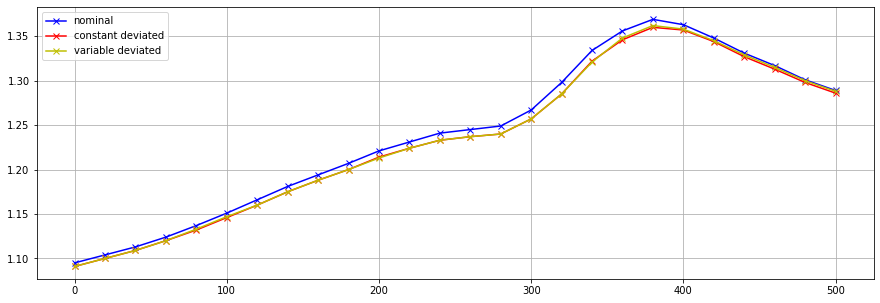

In [8]:
#### BUILDING KQ FIGURES
plt.figure(figsize=(15,5));
plt.plot(time,values_nom,'b-x');
plt.plot(time,values_dev_const,'r-x');
plt.plot(time,values_dev_var,'y-x');
#plt.plot(time,gaps_for_tvel_during_cycle);
plt.legend(['nominal','constant deviated','variable deviated'])
plt.grid(True)
plt.show()


In [9]:
#### EXTRACTING KK
data_kk_nom=pd.read_csv('~D:/Vasiliev/Python/Jupyter/feb/2/y9-1_nom.csv',sep=';')
data_kk_dev_const=pd.read_csv('~D:/Vasiliev/Python/Jupyter/feb/2/y9-79-2_dev_const.csv',sep=';')
data_kk_dev_var=pd.read_csv('~D:/Vasiliev/Python/Jupyter/feb/2/y9-79-3_dev_var.csv',sep=';')

In [10]:
# MAX KK SEARCHING
#data_kk_nom.loc[data_kk_nom['kk'].idxmax()]
#while(1):
#    if (data_kk_nom.loc[data_kk_nom['kk'].idxmax(),'tvel']!=287):
#        data_kk_nom.loc[data_kk_nom['kk'].idxmax(),'kk']=0
#    else:
#        print(data_kk_nom.iloc[data_kk_nom['kk'].idxmax()])
#        print(data_kq_nom.loc[data_kk_nom.loc[data_kk_nom['kk'].idxmax(),'tvs']])
#        break;

In [11]:
#### INITIALIZING KK-ARRAYS
rods_data_nom=np.zeros(evaluated_rods_numbers.size*cycle_lenght);
rods_data_dev_const=np.zeros(evaluated_rods_numbers.size*cycle_lenght);
rods_data_dev_var=np.zeros(evaluated_rods_numbers.size*cycle_lenght);

In [12]:
#### EXTRACTIONG KK DATA
for _t in range(0,cycle_lenght):
    for i in range(0,evaluated_rods_numbers.size):
        _tvel=evaluated_rods_numbers[i]
        parsed_string_nom=data_kk_nom.query("tvs==@evaluated_fa_number & time==@_t & tvel==@_tvel")
        parsed_string_dev_const=data_kk_dev_const.query("tvs==@evaluated_fa_number & time==@_t & tvel==@_tvel")
        parsed_string_dev_var=data_kk_dev_var.query("tvs==@evaluated_fa_number & time==@_t & tvel==@_tvel")
        parsed_string_nom.index=[1]
        parsed_string_dev_const.index=[1]
        parsed_string_dev_var.index=[1]
        u=parsed_string_nom.loc[1,'kk']
        v=parsed_string_dev_const.loc[1,'kk']
        w=parsed_string_dev_var.loc[1,'kk']
        rods_data_nom[evaluated_rods_numbers.size*_t+i]=u;
        rods_data_dev_const[evaluated_rods_numbers.size*_t+i]=v;
        rods_data_dev_var[evaluated_rods_numbers.size*_t+i]=w;

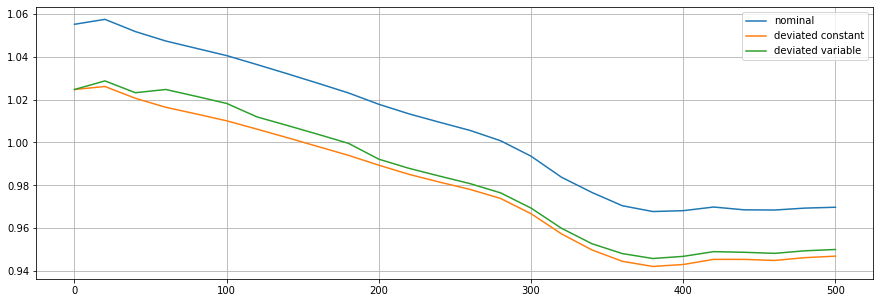

In [13]:
#### BUILDING KK FIGURES
plt.figure(figsize=(15,5));

## FOR ALL
#for rod in range(0,evaluated_rods_numbers.size):
#    dn=np.zeros(cycle_lenght)
#    ddc=np.zeros(cycle_lenght)
#    ddv=np.zeros(cycle_lenght)
#    for _t in range(0,cycle_lenght):
#        inx=(rod+(evaluated_rods_numbers.size*_t));
#        dn[_t]=rods_data_nom[(rod+(evaluated_rods_numbers.size*_t))];
#        ddc[_t]=rods_data_dev_const[(rod+(evaluated_rods_numbers.size*_t))];
#        ddv[_t]=rods_data_dev_var[(rod+(evaluated_rods_numbers.size*_t))];
#    plt.plot(time,dn[1])
#    plt.plot(time,ddc[1])
#    plt.plot(time,ddv[1])

## FOR ONE
dn=np.zeros(cycle_lenght)
ddc=np.zeros(cycle_lenght)
ddv=np.zeros(cycle_lenght)
selected_rod=1;
for _t in range(0,cycle_lenght):
    inx=(selected_rod+(evaluated_rods_numbers.size*_t));
    dn[_t]=rods_data_nom[(selected_rod+(evaluated_rods_numbers.size*_t))];
    ddc[_t]=rods_data_dev_const[(selected_rod+(evaluated_rods_numbers.size*_t))];
    ddv[_t]=rods_data_dev_var[(selected_rod+(evaluated_rods_numbers.size*_t))];
plt.plot(time,dn)
plt.plot(time,ddc)
plt.plot(time,ddv)
plt.legend(['nominal','deviated constant','deviated variable','gap size']);
plt.grid(True)
plt.show();

In [14]:
#### CALCULATING KR
kr_nom=np.zeros(cycle_lenght)
kr_dev_const=np.zeros(cycle_lenght)
kr_dev_var=np.zeros(cycle_lenght)
for _t in range(0,cycle_lenght):
    kr_nom[_t]=rods_data_nom[(selected_rod+(evaluated_rods_numbers.size*_t))]*values_nom[_t];
    kr_dev_const[_t]=rods_data_dev_const[(selected_rod+(evaluated_rods_numbers.size*_t))]*values_dev_const[_t];
    kr_dev_var[_t]=rods_data_dev_var[(selected_rod+(evaluated_rods_numbers.size*_t))]*values_dev_const[_t];

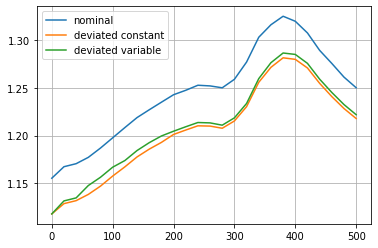

In [15]:
#### BUIDLING KR
plt.plot(time,kr_nom);
plt.plot(time,kr_dev_const);
plt.plot(time,kr_dev_var);
plt.legend(['nominal','deviated constant','deviated variable']);
plt.grid(True)
plt.show();

In [16]:
#### LOADING GAPS DATA
original_gaps=pd.read_csv('~D:/Vasiliev/Python/Jupyter/feb/2/gaps_for_tvel_core1.csv',sep=';')
_otime=original_gaps.loc[0:11,'time']
_otime-=3727
_ogap=original_gaps.loc[0:11,'gap1']

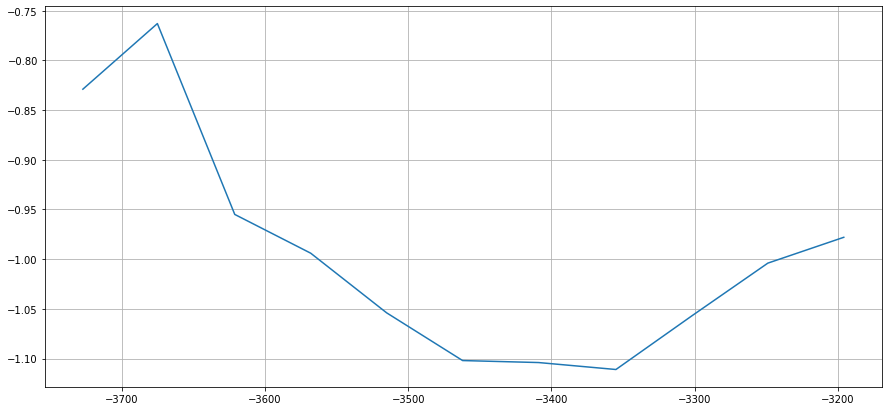

In [17]:
#### BUILDING GAPS DATA
#plt.plot(time,gaps_for_tvel_during_cycle)
plt.figure(figsize=(15,7))
plt.plot(_otime,_ogap);
plt.grid(True)
plt.show();

In [18]:
####################################
####################################
######### HOTTEST FUEL ROD #########
####################################
####################################

In [19]:
## RESEARCH FOR TVS = 62, TVEL = 287
## EXTENDED
## 0

evaluated_rods_numbers=np.array([277,287,297,307,317,327]);
evaluated_fa_number_=62;
cycle_lenght=26;
_data_kk_nom=pd.read_csv('~D:/Vasiliev/Python/Jupyter/feb/2/y9-1_nom.csv',sep=';')
_data_kk_dev_const=pd.read_csv('~D:/Vasiliev/Python/Jupyter/feb/2/y9-62-1_dev_const.csv',sep=';')
_data_kk_dev_var=pd.read_csv('~D:/Vasiliev/Python/Jupyter/feb/2/y9-62-2_dev_var.csv',sep=';')

In [20]:
## 1
_rods_data_nom=np.zeros(evaluated_rods_numbers.size*cycle_lenght);
_rods_data_dev_const=np.zeros(evaluated_rods_numbers.size*cycle_lenght);
_rods_data_dev_var=np.zeros(evaluated_rods_numbers.size*cycle_lenght);

In [21]:
## 2
for _t in range(0,cycle_lenght):
    for i in range(0,evaluated_rods_numbers.size):
        _tvel=evaluated_rods_numbers[i]
        parsed_string_nom=_data_kk_nom.query("tvs==@evaluated_fa_number_ & time==@_t & tvel==@_tvel")
        parsed_string_dev_const=_data_kk_dev_const.query("tvs==@evaluated_fa_number_ & time==@_t & tvel==@_tvel")
        parsed_string_dev_var=_data_kk_dev_var.query("tvs==@evaluated_fa_number_ & time==@_t & tvel==@_tvel")
        parsed_string_nom.index=[1]
        parsed_string_dev_const.index=[1]
        parsed_string_dev_var.index=[1]
        u=parsed_string_nom.loc[1,'kk']
        v=parsed_string_dev_const.loc[1,'kk']
        w=parsed_string_dev_var.loc[1,'kk']
        _rods_data_nom[evaluated_rods_numbers.size*_t+i]=u;
        _rods_data_dev_const[evaluated_rods_numbers.size*_t+i]=v;
        _rods_data_dev_var[evaluated_rods_numbers.size*_t+i]=w;


In [22]:
## 3
_dn=np.zeros(cycle_lenght)
_ddc=np.zeros(cycle_lenght)
_ddv=np.zeros(cycle_lenght)

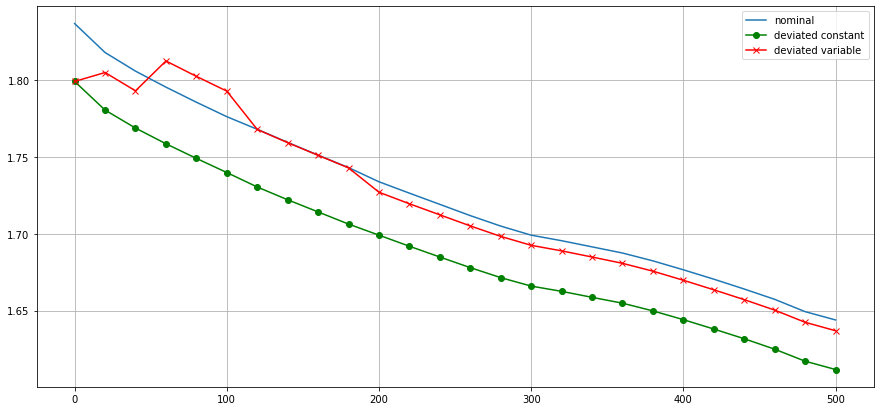

In [23]:
selected_rod=1;
for _t in range(0,cycle_lenght):
    inx=(selected_rod+(evaluated_rods_numbers.size*_t));
    _dn[_t]=_rods_data_nom[(selected_rod+(evaluated_rods_numbers.size*_t))];
    _ddc[_t]=_rods_data_dev_const[(selected_rod+(evaluated_rods_numbers.size*_t))];
    _ddv[_t]=_rods_data_dev_var[(selected_rod+(evaluated_rods_numbers.size*_t))];
plt.figure(figsize=(15,7));    
plt.plot(time,_dn)
plt.plot(time,_ddc,'g-o')
plt.plot(time,_ddv,'r-x')
plt.legend(['nominal','deviated constant','deviated variable','gap size']);
plt.grid(True)
plt.show();

In [24]:
gap=pd.read_csv('~D:/Vasiliev/Python/Jupyter/feb/2/gaps_for_tvel_core1.csv',sep=';')

In [25]:
#plt.figure(figsize=(15,7));    
#time_gap_array=np.array([0,20,60,120,200,360,500]);
#gap*=0.25
#gap2+=1.75
#plt.plot(time,_ddv,'g-x')
#plt.plot(time_gap_array,gap_62);
#plt.grid(True)


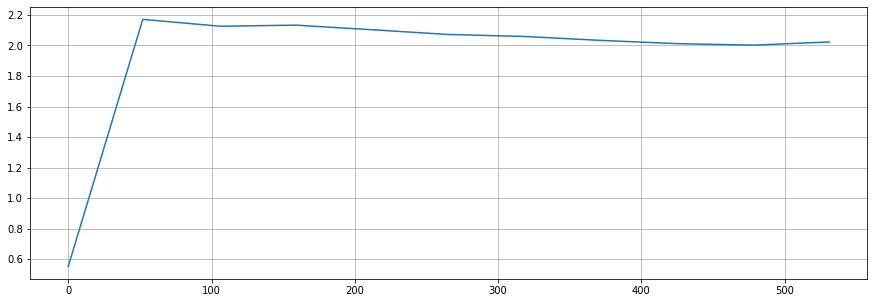

In [26]:
plt.figure(figsize=(15,5))
tm=gap.loc[0:10,'time']
gp1=gap.loc[0:10,'gap1']
gp2=gap.loc[0:10,'gap2']
plt.plot(tm,gp2)
plt.grid(True)
plt.show()

In [27]:
####################################################
####################################################
#### NEW TEST: CHECK GAP SIZE BETWEEN NEIGHBORS ####
####################################################
####################################################

In [28]:
gapList=pd.read_csv('~D:/Vasiliev/PERMAK-A/Core1/coords_1.pvm',sep=';')
data_kq_nom=pd.read_csv('~D:/Vasiliev/Python/Jupyter/feb/2/z9-1_nom.csv')

In [29]:
tvs_n=1
_index=[1,2,3,4,5,6,7,8,9,10,11]
dfg=pd.DataFrame(columns=_index)
kq_v=pd.DataFrame(columns=['kq'])

In [30]:
tvs=gapList.query('tvs==@tvs_n')
tvs_n+=1
tvs1=gapList.query('tvs==@tvs_n')
tvs.index=_index
tvs1.index=_index
res=tvs1['x']-tvs['x']
dfg.loc[tvs_n-1]=res
kq_v.loc[tvs_n-1]=data_kq_nom.iloc[tvs_n-1]
res
print(tvs_n)

2


In [31]:
kkv=gapList.query('tvs==52')
kkw=gapList.query('tvs==53')

In [32]:
kkv.index=_index
kkw.index=_index
rs=kkw-kkv

In [33]:
rs

,tvs,x,y
1,1,0.108,-1.354
2,1,1.289,-0.307
3,1,1.196,-0.598
4,1,1.261,-0.679
5,1,1.342,-0.730
6,1,1.442,-0.833
7,1,1.555,-0.905
8,1,1.682,-1.020
9,1,1.745,-1.136
10,1,1.780,-1.261


In [34]:
data_kq_nom.iloc[51]

kq    1.115
Name: 51, dtype: float64

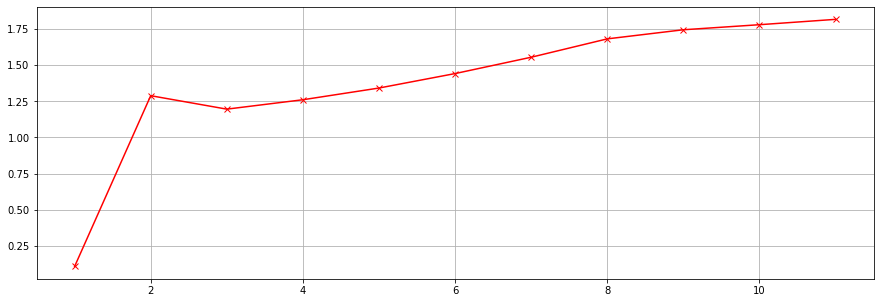

In [35]:
plt.figure(figsize=(15,5))
plt.plot(rs['x'],'r-x')
plt.grid(True)
plt.show()

In [3]:
####################################################
################ CONSERVATIVE  CASE ################
###########  TVS #52, CB = 0, GAP = 2mm  ###########
####################################################

In [15]:
conservative=pd.read_csv('~D:/Vasiliev/Python/Jupyter/feb/2/y9-52_c.csv',sep=';')
conservative_tvs_1=52
conservative_tvs_2=53
conservative_tvel=286

In [16]:
kk=conservative.query('tvs==@conservative_tvs_1 & tvel==@conservative_tvel')

In [17]:
####################################################
############## RESEARCHING FOR 52 TVS ##############
####################################################

In [18]:
_dkn=pd.read_csv('~D:/Vasiliev/Python/Jupyter/feb/2/y9-1_nom.csv',sep=';')
_dkdc=pd.read_csv('~D:/Vasiliev/Python/Jupyter/feb/2/y9-52-1_dev_const.csv',sep=';')
_dkdv=pd.read_csv('~D:/Vasiliev/Python/Jupyter/feb/2/y9-52-2_dev_var.csv',sep=';')
cycle_lenght=26
evaluated_fa_number_=52;
evaluated_rods_numbers=np.array([277,287,297,307,317,327]);

In [19]:
_rdn=np.zeros(evaluated_rods_numbers.size*cycle_lenght);
_rddc=np.zeros(evaluated_rods_numbers.size*cycle_lenght);
_rddv=np.zeros(evaluated_rods_numbers.size*cycle_lenght);

In [20]:
## 2
for _t in range(0,cycle_lenght):
    for i in range(0,evaluated_rods_numbers.size):
        _tvel=evaluated_rods_numbers[i]
        
        parsed_string_nom=_dkn.query("tvs==@evaluated_fa_number_ & time==@_t & tvel==@_tvel")
        parsed_string_dev_const=_dkdc.query("tvs==@evaluated_fa_number_ & time==@_t & tvel==@_tvel")
        parsed_string_dev_var=_dkdv.query("tvs==@evaluated_fa_number_ & time==@_t & tvel==@_tvel")
        
        parsed_string_nom.index=[1]
        parsed_string_dev_const.index=[1]
        parsed_string_dev_var.index=[1]
        u=parsed_string_nom.loc[1,'kk']
        v=parsed_string_dev_const.loc[1,'kk']
        w=parsed_string_dev_var.loc[1,'kk']
        _rdn[evaluated_rods_numbers.size*_t+i]=u;
        _rddc[evaluated_rods_numbers.size*_t+i]=v;
        _rddv[evaluated_rods_numbers.size*_t+i]=w;


In [21]:
## 3
_dn=np.zeros(cycle_lenght)
_ddc=np.zeros(cycle_lenght)
_ddv=np.zeros(cycle_lenght)
time=np.zeros(cycle_lenght)

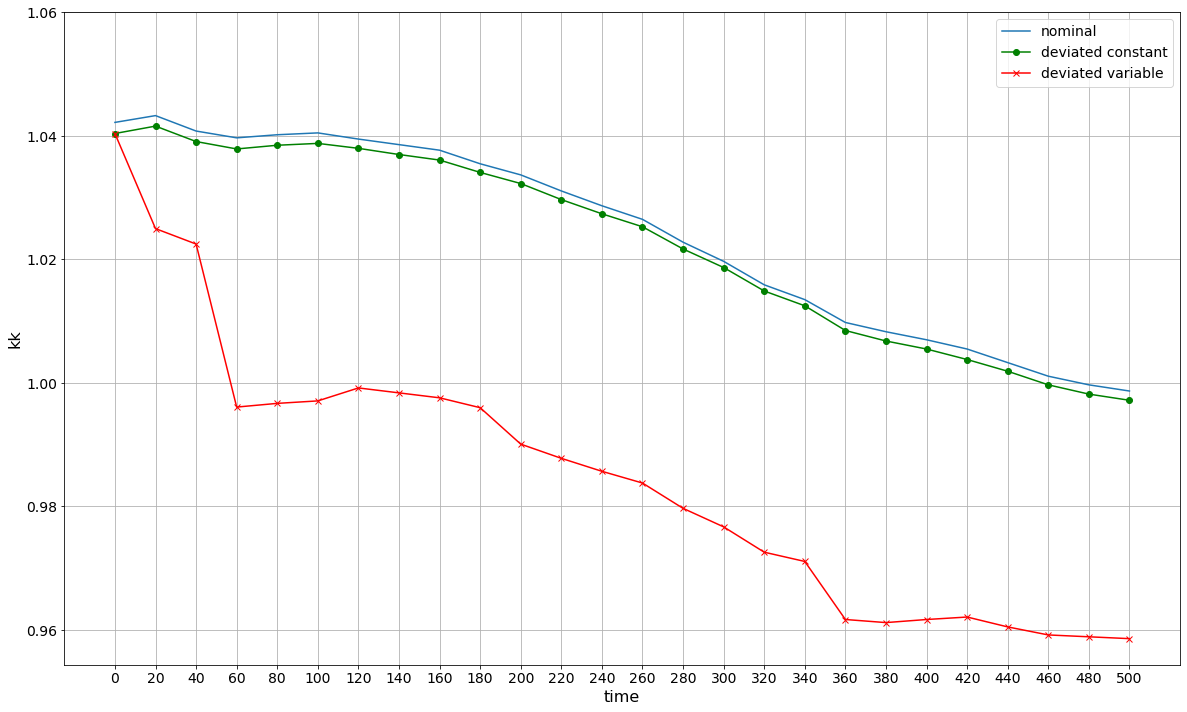

In [22]:
selected_rod=1;
for _t in range(0,cycle_lenght):
    time[_t]=(_t)*20;
    inx=(selected_rod+(evaluated_rods_numbers.size*_t));
    _dn[_t]=_rdn[(selected_rod+(evaluated_rods_numbers.size*_t))];
    _ddc[_t]=_rddc[(selected_rod+(evaluated_rods_numbers.size*_t))];
    _ddv[_t]=_rddv[(selected_rod+(evaluated_rods_numbers.size*_t))];
plt.figure(figsize=(20,12));    
plt.plot(time,_dn)
plt.plot(time,_ddc,'g-o')
plt.plot(time,_ddv,'r-x')
plt.legend(['nominal','deviated constant','deviated variable','gap size'],fontsize=14);
plt.xticks(np.arange(0,520,step=20),fontsize=14)
plt.yticks(np.arange(0.96,1.06,step=0.02),fontsize=14)
plt.xlabel('time',fontsize=16)
plt.ylabel('kk',fontsize=16)

plt.grid(True)
plt.show();

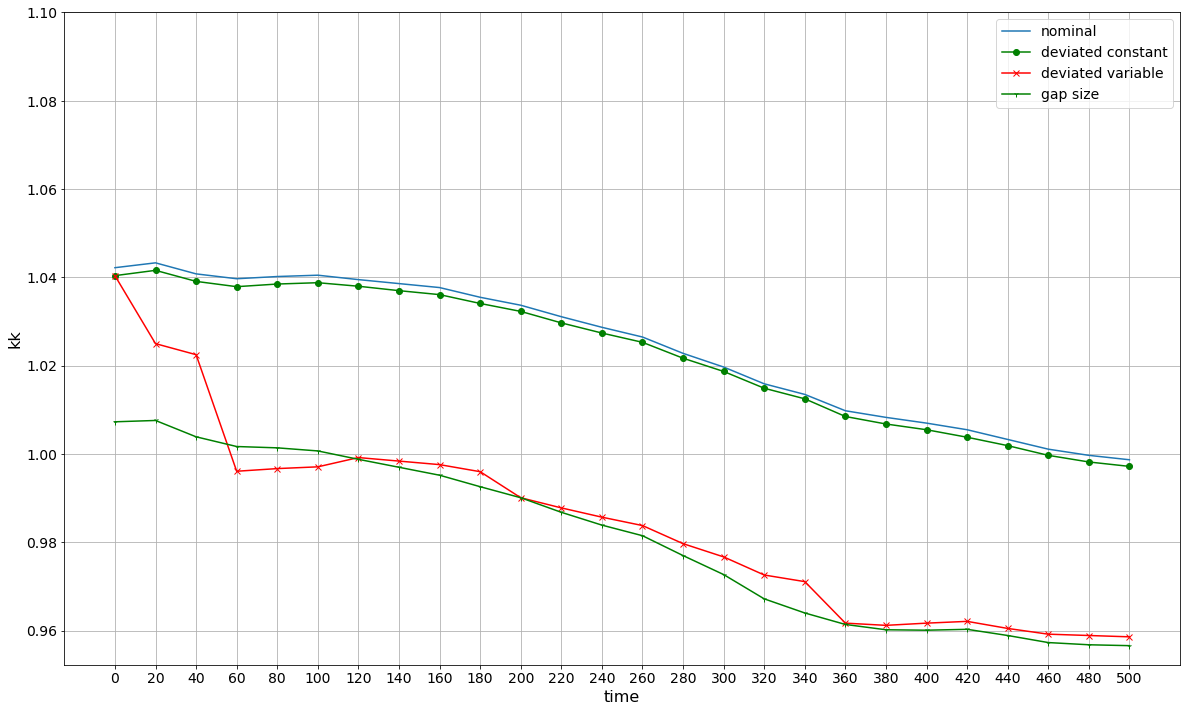

In [23]:
#kk.index=indexes
plt.figure(figsize=(20,12));    
plt.plot(time,_dn)
plt.plot(time,_ddc,'g-o')
plt.plot(time,_ddv,'r-x')
plt.plot(time,kk.loc[:,'kk'],'g-1')
plt.legend(['nominal','deviated constant','deviated variable','gap size','conservative'],fontsize=14);
plt.xticks(np.arange(0,520,step=20),fontsize=14)
plt.yticks(np.arange(0.96,1.1,step=0.02),fontsize=14)
plt.xlabel('time',fontsize=16)
plt.ylabel('kk',fontsize=16)

plt.grid(True)
plt.show();